# Retail Bank Marketing Campaign Analysis


We are looking at the data collected from direct marketing campaigns of a Portuguese banking institution. The method of marketing consisted of customer phone calls. Most potential subscribers required multiple touch points to determine if the customer had subscribed to the featured product.

The product for this focused analysis is a term deposit, a cash investment that is held at a financial instituion at an agreed interest rate for a fixed term (amount of time).

We will be building a classification model to correctly analyze the binary customer behavior (yes - subscribed or no - did not subscribe).

The original source data can be found at:  http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

This project will satisfy the third project requirement for the Data Science Bootcamp at the Flatiron School.

<img src='images/bank.png'>

### Below is a list of all the attributes included in the dataset, as well as a description and the expected data type


#### __Attribute Information:__

__Bank client data:__

Age: (numeric)<br>
Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')<br>
Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)<br>
Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')<br>
Default: has credit in default? (categorical: 'no', 'yes', 'unknown')<br>
Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')<br>
Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

__Related with the last contact of the current campaign:__

Contact: contact communication type (categorical: 'cellular','telephone')<br>
Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
Duration: last contact duration, in seconds (numeric). 

__Other attributes:__

Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means 
client was not previously contacted)<br>
Previous: number of contacts performed before this campaign and for this client (numeric)<br>
Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>


__Social and economic context attributes:__

Emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
Cons.price.idx: consumer price index - monthly indicator (numeric)<br>
Cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br>
Euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
Nr.employed: number of employees - quarterly indicator (numeric)<br>

__The output variable is stored as 'y'__

## Obtaining, Exploration and Cleaning

First, we will import our libraries and then we can get started loading and cleaning the data.


In [3]:
#importing libraries under standard aliases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#inline visualizations
%matplotlib inline

#importing our models and scoring libraries
#we'll be using mostly Scikit.Learn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier

#visualtion methods and methods for model analysis
from sklearn.metrics import roc_curve, auc, confusion_matrix

#setting a random seed for reproduceability
import random
random.seed(42)

#setting filter warnings to ignore to keep our notebook clean
import warnings
warnings.filterwarnings("ignore")



In [4]:
#loading the whole data set from the csv file and into pandas
#note that this file is ';' separated, not ',' separated

data = pd.read_csv("bank-additional-full.csv", sep = ';')

#reviwing the dataframe to ensure everything loaded correctly
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Before we begin cleaning, we will get a feel for the data by looking at some summary statistics.

In [5]:
print(data.shape)

data.describe()

(41188, 21)


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
#checking for Null values 
data.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [7]:
#looking at our target column 
print(data.y.unique())

['no' 'yes']


The first step in cleaning will be to convert the target column, y, to field containing numerical data 0 for 'no' and 1 for 'yes'

In [8]:
for i in range(len(data.y)):
    if data.y[i] == 'no':
        data.y[i] = 0
    else:
        data.y[i]=1
        
data.y.unique()

array([0, 1], dtype=object)

And how many 'yes' customers do we actually have?

In [9]:
data.y.sum()

4640

Converting the target variable form a 'yes/no' to a [1,0] leads to the first useful insight: an 11.3% Sucess rate on a phone marketing campaign.  From my knowledge of retail phone sales, this is very reasonable.  A direct phone  marketing approach is worth repeating if we can identify these 'yes' customers in advance.  Then it's only a matter of making all the calls.

Next we'll look at the .info() summary statistics to ensure that the expected column type matches so that we can handle null values that are obscured from .isna()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

Everything looks clean now.  We can save our target column as a single variable out of the dataframe and drop the column.

In [11]:
#saving y as our target 
target = data.y

#dropping y from the new dataframe of features
df = data.drop(['y'], axis=1)

#checking to ensure everything loaded properly
print(target.shape, df.shape)
df.head()

(41188,) (41188, 20)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [12]:
#creating a list of categorical columns for easier coding
cols = ['job', 'marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

#using the pandas get_dummies method and adding a prefix to denote the columns we changed
df = pd.get_dummies(df, prefix='d_', columns=cols)
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,d__oct,d__sep,d__fri,d__mon,d__thu,d__tue,d__wed,d__failure,d__nonexistent,d__success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22180710>,
      dtype=object)

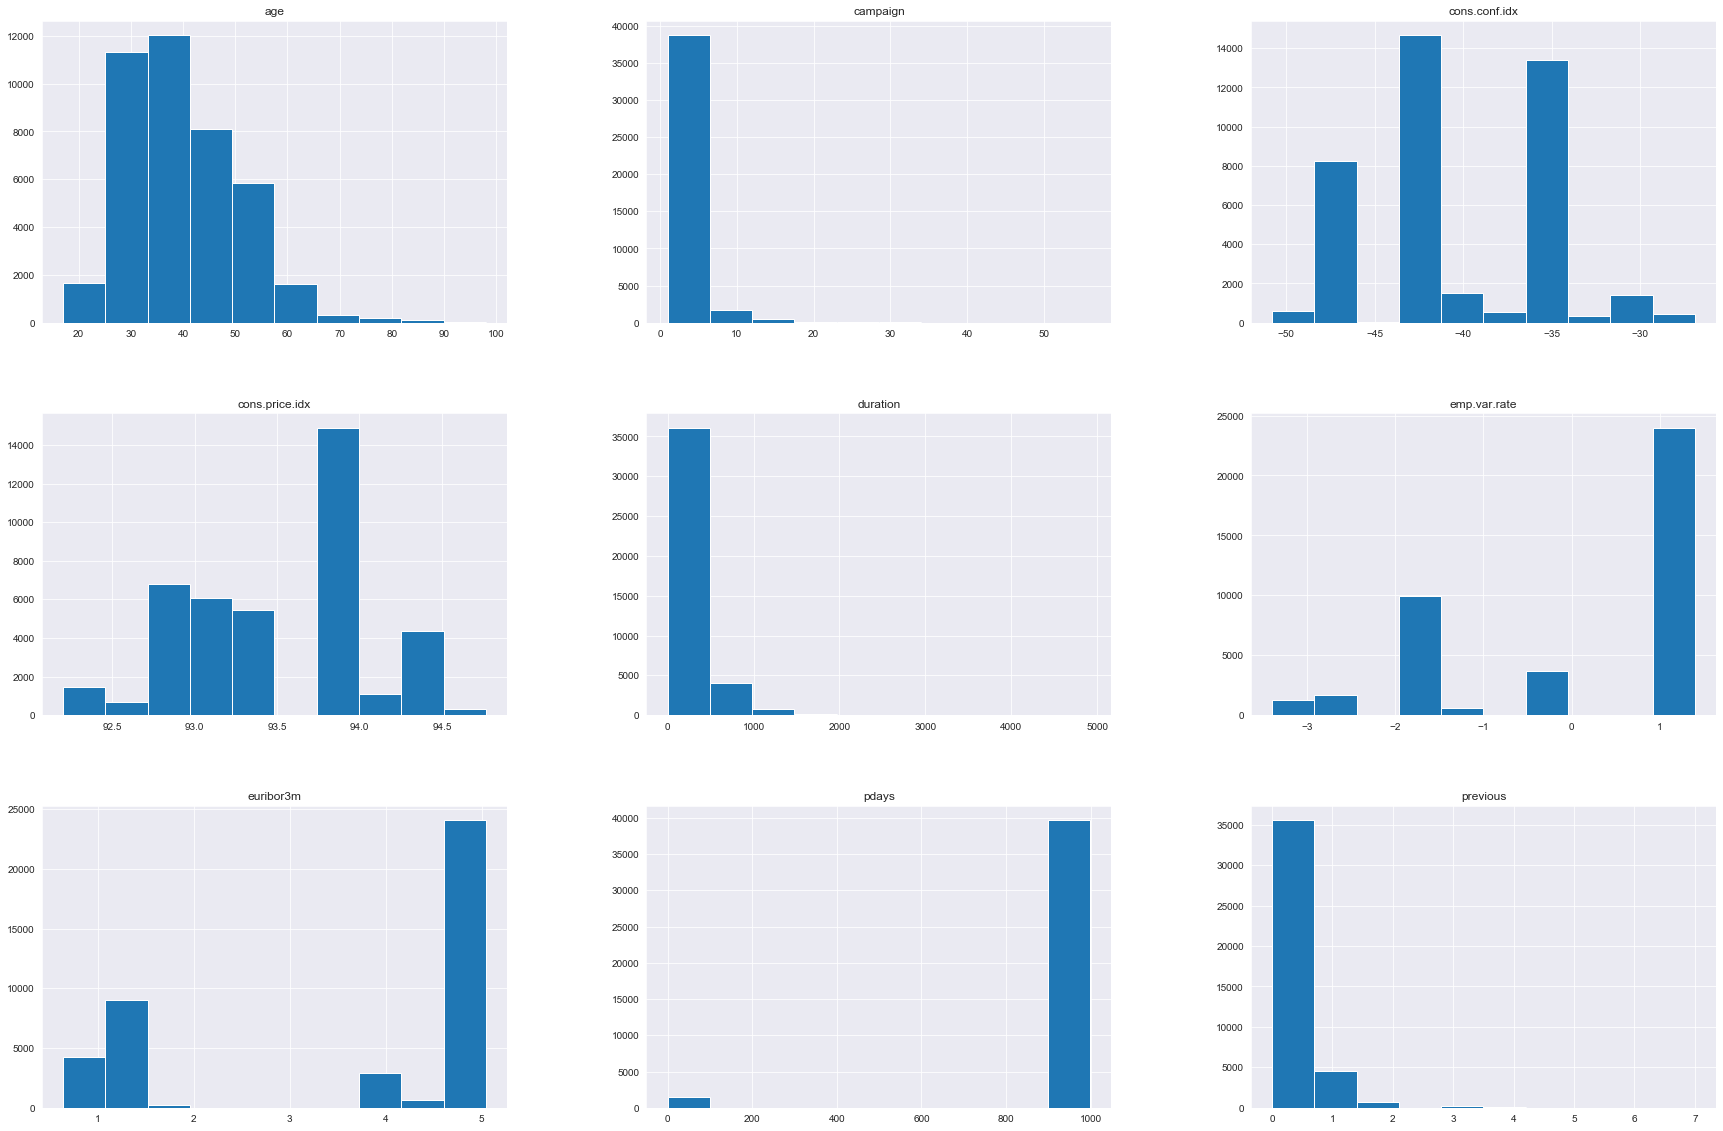

In [13]:
#setting the plot style using seaborn
sns.set_style('darkgrid')

#reviewing the 9 features for ease of review and plotting the histograms
features = df.iloc[:, 0:9]
features.hist(figsize=(30,20))

The data doesn't really look normally distributed, however, for most machine learning algorithms this isn't an issue.  We will be exploring the data further with a box-and-whisker plot before we start modelling.

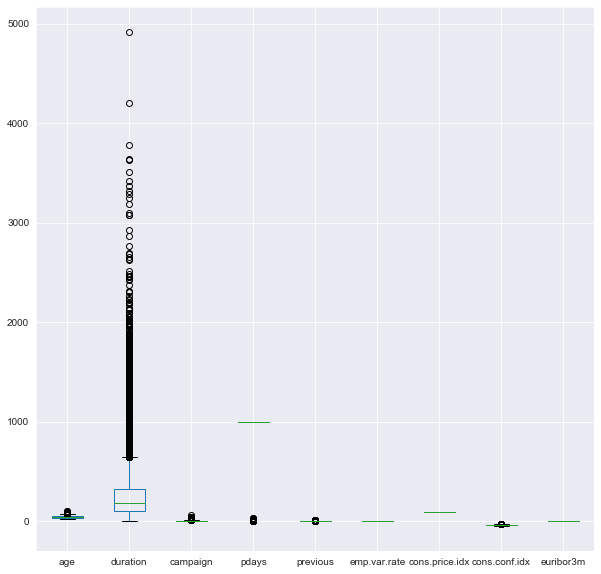

In [14]:
#making the box-and-whisker plot for the data
features.boxplot(figsize=(10,10))